In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
from matplotlib.ticker import MultipleLocator

In [11]:
print('NumPy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))

NumPy version: 1.15.4
pandas version: 0.23.4
matplotlib version: 3.0.1


In [2]:
%matplotlib notebook

In [3]:
# SN metadata

z = 0.0307
t_max = 2458986.91

In [4]:
marshal_df = pd.read_csv('../data/photometry/growth_marshall_lc.csv')
marshal_df.head(5)

,date,jdobs,filter,absmag,magpsf,sigmamagpsf,limmag,instrument,programid,reducedby,refsys,issub,isdiffpos
0,2020 Apr 05,2.458945e+06,g,99.0,99.0,99.0,19.89,P48+ZTF,1,None,None,True,True
1,2020 Apr 05,2.458945e+06,r,99.0,99.0,99.0,20.05,P48+ZTF,1,None,None,True,True
2,2020 Apr 16,2.458956e+06,r,99.0,99.0,99.0,20.02,P48+ZTF,1,None,None,True,True
3,2020 Apr 16,2.458956e+06,g,99.0,99.0,99.0,20.21,P48+ZTF,1,None,None,True,True
4,2020 Apr 24,2.458964e+06,g,99.0,99.0,99.0,20.48,P48+ZTF,1,None,None,True,True


<IPython.core.display.Javascript object>


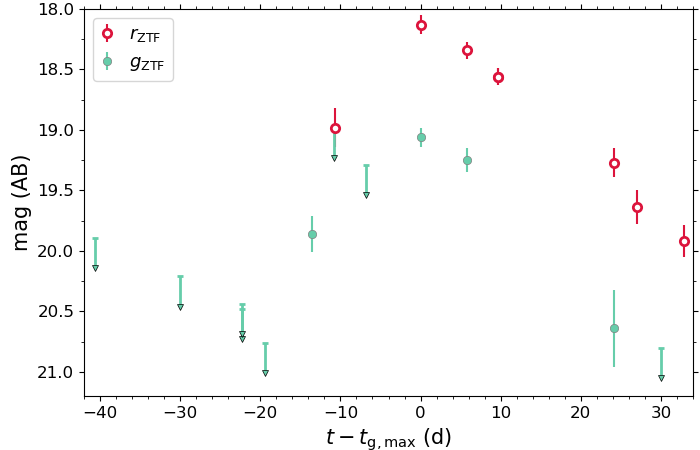

In [24]:
color_dict = {1: 'MediumAquaMarine',
              2: 'Crimson', 
              3: 'Goldenrod', 
              "uvw2": "#D71DE5",
              "uvm2": "#008DCB",
              "uvw1": "#A4A4E3"}

mark_color_dict = {2: 'white',
                   1: 'MediumAquaMarine',
                   3: 'Goldenrod'}
sym_dict = {1: 'o',
            2: 'o',
            3: 'X'}
mec_dict = {2: 'Crimson',
            1: '0.5',
            3: '0.5'}
mew_dict = {2: 2,
            1: 0.5,
            3: 0.5}
filt_dict = {1:r'$g_\mathrm{ZTF}$', 
             2:r'$r_\mathrm{ZTF}$', 
             3:r'$i_\mathrm{ZTF}$'}
zorder_dict = {3: 10,
               1: 5,
               2: 2}
str_dict = {3: 'i',
            1: 'g',
            2: 'r'}


fig, ax = plt.subplots(figsize=(7,4.5))

for filt in [2,1]:

    # Marshal LC
    this_lc = np.where((marshal_df['filter'] == str_dict[filt]) & 
                       (marshal_df['instrument'] == 'P48+ZTF') &
                       (marshal_df['programid'] == '1') &
                       (marshal_df['sigmamagpsf'] < 99))
    this_ul = np.where((marshal_df['filter'] == str_dict[filt]) & 
                       (marshal_df['instrument'] == 'P48+ZTF') &
                       (marshal_df['programid'] == '1') &
                       (marshal_df['sigmamagpsf'] == 99))

    ax.errorbar((marshal_df.iloc[this_lc].jdobs.values - t_max)/(1+z), 
                marshal_df.iloc[this_lc].magpsf.values, marshal_df.iloc[this_lc].sigmamagpsf.values, 
                fmt = sym_dict[filt], color=mark_color_dict[filt], ecolor=color_dict[filt],
                mec=mec_dict[filt], mew=mew_dict[filt], 
                label = filt_dict[filt])

    
    ULoffset = 0.25
    yerr = np.zeros((2, len(this_ul[0])))
    yerr[0,:] += ULoffset
#     ax.errorbar((lc_df.jdobs.iloc[~ix].values[ulim_filt] - 2400000.5 - tb_max)/(1+z) - t_fl, 
#                 ulims[ulim_filt]+ULoffset, yerr = yerr, 
#                 fmt = 'v', color = color_dict[filt], ms = 5, 
#                 elinewidth=2, capsize = 0, mec = 'k', mew = 0.5)
#     ax.plot((lc_df.jdobs.iloc[~ix].values[ulim_filt] - 2400000.5 - tb_max)/(1+z) - t_fl, 
#             ulims[ulim_filt], '_', 
#             color = color_dict[filt], mew = 2, ms = 5)


ax.errorbar((marshal_df.iloc[this_ul].jdobs.values - t_max)/(1+z), 
            marshal_df.iloc[this_ul].limmag.values+ULoffset, yerr = yerr, 
            fmt = 'v', color = mark_color_dict[filt], ecolor=color_dict[filt], 
            ms = 5, elinewidth=2, capsize = 0, mec = 'k', mew = 0.5)
ax.plot((marshal_df.iloc[this_ul].jdobs.values - t_max)/(1+z), 
            marshal_df.iloc[this_ul].limmag.values, '_', 
        color = color_dict[filt], mew = 2, ms = 5)



# for phase in phases.phase.values:
#     ax.plot([phase-t_fl, phase-t_fl],
#             [21.8, 22.1], '0.6')

    
ax.set_ylim(21.2,18.)
ax.set_ylabel(r'mag (AB)', fontsize=15)
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

ax.set_xlim(-42,34)
ax.set_xlabel(r'$t - t_\mathrm{g,max}$ (d)', fontsize=15)
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.tick_params(which='both', top=True, right=True, labelsize=12)

ax.legend(fancybox=True, loc=2, fontsize=13, 
          handlelength=0.8)

# # set up time relative to T_Bmax
# ax2 = ax.twiny()
# ax2.set_xlabel(r"$t - T_{B,\mathrm{max}} \; (\mathrm{d})$", fontsize = 17)
# ax2.set_xlim(ax.get_xlim())
# ax2.set_xscale("symlog", linthreshx=3, linscalex = 0.35, subsx = [2,3,4,5,6,7,8,9])

# bmax_ticks = [-17, -15, -13, -11, -9, -7, -5, 0, 10, 20, 40, 60, 80, 100, 130]
# ax2.set_xticks(np.array(bmax_ticks) - t_fl)
# ax2.set_xticklabels(bmax_ticks, fontsize = 12)
# ax2.xaxis.set_minor_locator(FixedLocator(np.append(np.linspace(-20, 10, 31), np.linspace(20, 140, 13)) - t_fl))
# ax2.tick_params(labelsize=14)

fig.subplots_adjust(left=0.12, bottom=0.12,top=0.98,right=0.99)